# Homework - Data Visualization

by `Suppawit Thiamhong`

In [42]:
install.packages("patchwork")

library(tidyverse)
library(lubridate)
library(patchwork)
library(scales)
library(glue)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Data Overview

In [34]:
data <- read_csv("HRDataset.csv")

Rows: 311 Columns: 36

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): Employee_Name, Position, State, Zip, DOB, Sex, MaritalDesc, Citize...
dbl (17): EmpID, MarriedID, MaritalStatusID, GenderID, EmpStatusID, DeptID, ...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [9]:
glimpse(data)

Rows: 311
Columns: 36
$ Employee_Name              <chr> "Adinolfi, Wilson  K", "Ait Sidi, Karthikey…
$ EmpID                      <dbl> 10026, 10084, 10196, 10088, 10069, 10002, 1…
$ MarriedID                  <dbl> 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0…
$ MaritalStatusID            <dbl> 0, 1, 1, 1, 2, 0, 0, 4, 0, 2, 1, 1, 2, 0, 2…
$ GenderID                   <dbl> 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1…
$ EmpStatusID                <dbl> 1, 5, 5, 1, 5, 1, 1, 1, 3, 1, 5, 5, 1, 1, 5…
$ DeptID                     <dbl> 5, 3, 5, 5, 5, 5, 4, 5, 5, 3, 5, 5, 3, 5, 5…
$ PerfScoreID                <dbl> 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3…
$ FromDiversityJobFairID     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0…
$ Salary                     <dbl> 62506, 104437, 64955, 64991, 50825, 57568, …
$ Termd                      <dbl> 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1…
$ PositionID                 <dbl> 19, 27, 20, 19, 19, 19, 24, 19, 19, 14, 19,…
$ Position        

# Data Visualization

# Chart1: Total employee in each department

`summarise()` has grouped output by 'Department'. You can override using the `.groups` argument.



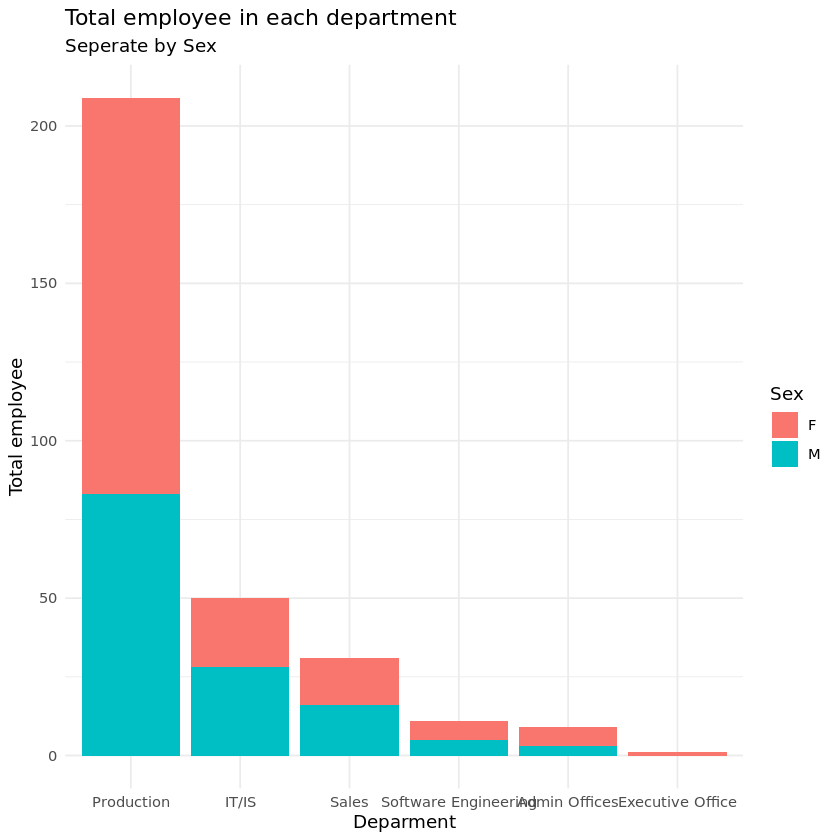

In [35]:
data %>%
    group_by(Department,Sex)%>%
    summarise(Total_employee = n()) %>%                                            # sum number of employee in each department  

    ggplot(aes(reorder(Department,-Total_employee),Total_employee, fill = Sex))+   # create bar chart sort descending order
        geom_bar(stat = "identity")+                                               # total employee and seperate by sex
        theme_minimal()+
        labs(title = "Total employee in each department",
             subtitle = "Seperate by Sex",
             x="Deparment",
             y="Total employee")

# Chart2: The relationship between the employee's salary and their performance score

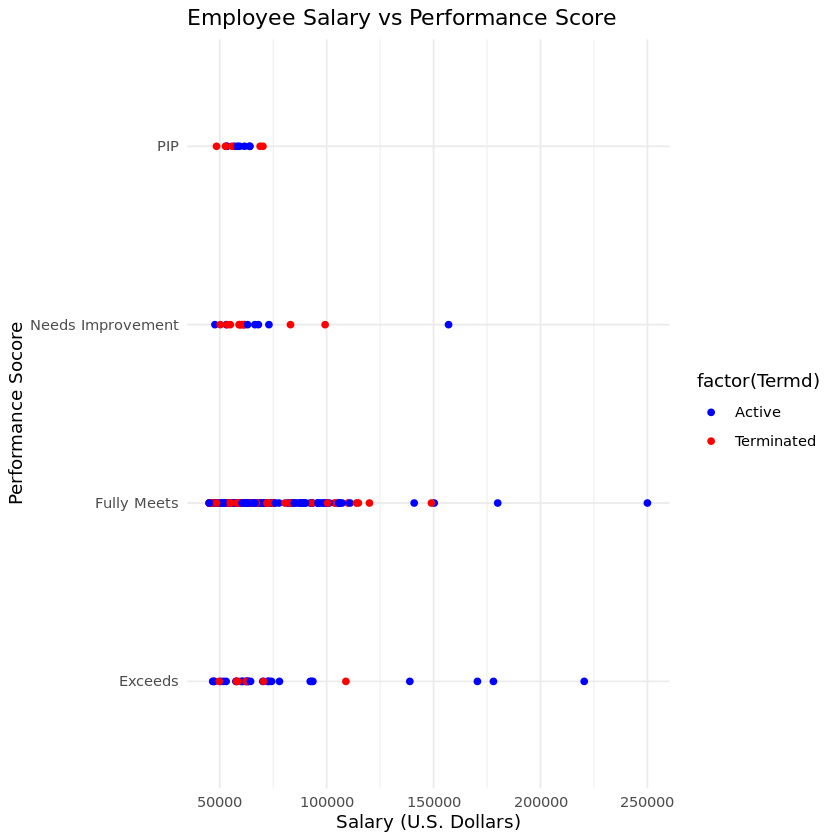

In [36]:
ggplot(data,aes(Salary,PerformanceScore, color = factor(Termd)))+          # create scatter plot and change Termd to factor
    geom_point()+   
    labs(title = "Employee Salary vs Performance Score",
         x="Salary (U.S. Dollars)", 
         y="Performance Socore") +                                                   
    scale_color_manual(values = c("blue", "red"),                          # fill color and label 
                       labels = c("Active", "Terminated"))+
    theme_minimal()

# Chart3: The distribution of employee engagement survey results split by sex

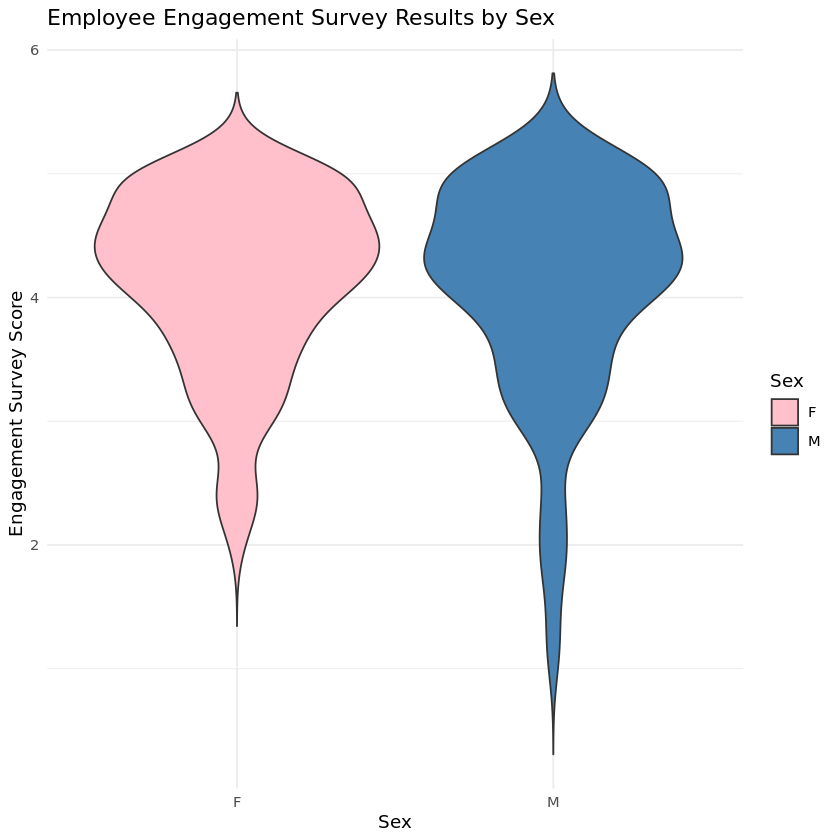

In [37]:
ggplot(data, aes(Sex,EngagementSurvey, fill = Sex)) +                        # create violin chart
  geom_violin(trim = FALSE) +
  labs(title = "Employee Engagement Survey Results by Sex",                  # fill color and labels
       x = "Sex",
       y = "Engagement Survey Score") +
  scale_fill_manual(values = c("pink", "steelblue")) +
  theme_minimal()

# Chart4: The relationship between employee salary and job performance

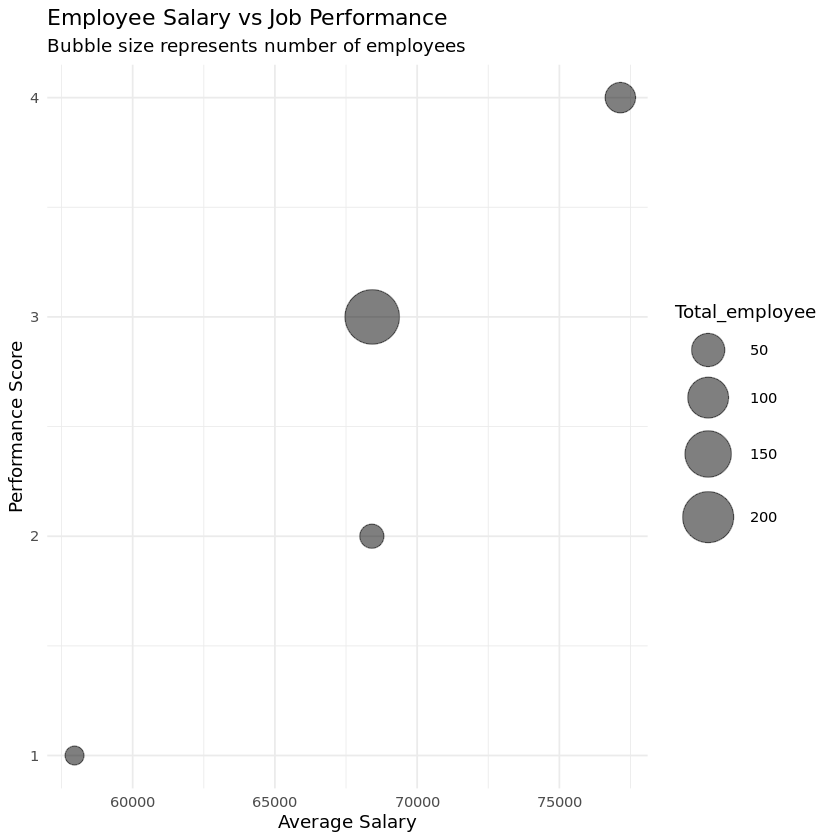

In [61]:
data_summary <- data %>% 
  select(Salary, PerfScoreID) %>%                                                  # select column salary and perfect score ID
  group_by(PerfScoreID) %>% 
  summarise(AvgSalary = mean(Salary, na.rm = TRUE), Total_employee = n())          # find average salary and number of employees

ggplot(data_summary, aes(x = AvgSalary, y = PerfScoreID, size = Total_employee)) + # create bubble chart 
  geom_point(alpha = 0.5) + 
  scale_size(range = c(5, 15)) + 
  labs(x = "Average Salary", y = "Performance Score", 
       title = "Employee Salary vs Job Performance", 
       subtitle = "Bubble size represents number of employees") +
  theme_minimal()